In [2]:
%matplotlib inline
# %pip install vaderSentiment
# %pip install pyodbc

import tweepy
import string
import pandas as pd
import numpy as np
import regex as re
import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pyodbc
import json
#nltk.download('stopwords')
#nltk.download('punkt')

analyser = SentimentIntensityAnalyzer()

In [3]:
# nltk.download('stopwords')
# nltk.download('punkt')


In [4]:
# Defining keys and auth.
consumer_key = "gdKqDWkNFK8dQDhlOjuI8ScsJ"
consumer_secret = "2OeGjpAcZJn5Ec4cmSYWGfYFpDL3WGxvEnbzjHwA0oqIddcPQe"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAGYiFQEAAAAAXwKhj4T90lw13zp2sDOVnwwaEKI%3DEiUjikGO324sETOB6la3TgVd6gotzpUOsS1YfwaGJNc7ZxsG7C"
access_token = "255561198-6cAxjGJ7X8wRKXrm539DvVFxo6c3V82h7k248MHm"
access_token_secret = "F2gmdhcENHr8yT7hhsYfDi05QOowlkm65MvOCr56qpDaY"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)


In [5]:
#SQL Connectivity
Server = "tweet.database.windows.net"
Database = "tweetdb"
Table = "tweetstb.dbo.tweetsdb"

#Connect Server
def connectSqlServer():
    try:
        conn = pyodbc.connect("DRIVER={ODBC Driver 17 for SQL Server} ;Server="+Server+"; Database="+Database+";Trusted_Connection=no;UID=tweetadmin;PWD=admin@123")
        return conn
    except:
        print("Error in Connecting Server")
        return "" 

connectSqlServer()

In [6]:
def insert_row(tweets_id,date_time,tweet_text):
    
    try:
        query = "INSERT INTO [dbo].[tweetstb] ([Tweet_ID], [Date_Time], [Tweet_Text]) VALUES(\'{0}\',\'{1}\',\'{2}\')".format(tweets_id,date_time,tweet_text)
        print(query)
        conn = connectSqlServer()
        cursor = conn.cursor()
        cursor.execute(query)
        # the connection is not autocommited by default. So we must commit to save our changes.
        conn.commit()
        return "Success"
    except Exception as e: 
        print(e)
        return "Fail"

In [7]:
tweet_list=[]
class MyStreamListener(tweepy.StreamListener):
    def __init__(self,api=None):
        super(MyStreamListener,self).__init__()
        self.num_tweets=0
        self.file=open("test.txt","w")
    def on_status(self,status):
        tweet=status._json
        self.file.write(json.dumps(tweet)+ '\n')
        tweet_list.append(status)
        self.num_tweets+=1
        if self.num_tweets<1000:
            return True
        else:
            return False
        self.file.close()

In [8]:
def clean_str(text):
    result = re.sub(r"http\S+", "", text.lower()).lstrip()
    result = re.sub(r"rt", "", result).lstrip()
    result = re.sub('\d',"",result)
    result = re.sub('@[^\s]+','',result)
    result = result.translate(str.maketrans('', '', string.punctuation))
    result = result.strip(",\"&\'")
    return result

In [9]:
try:
    tweets_list=[]
    #create streaming object and authenticate
    l = MyStreamListener()
    stream =tweepy.Stream(auth,l)
    #this line filters twiter streams to capture data by keywords
    stream.filter(languages=["en"], track=['spotify','music'])

    tweets_data_path='test.txt'
    tweets_data=[]
    count=0
    tweets_file=open(tweets_data_path,"r")
    #read in tweets and store on list
    for line in tweets_file:
        count+=1
        tweet=json.loads(line)
        #tweets_data.append(tweet)
        tweets_list.append([tweet['created_at'],tweet['id'],tweet['text'].lower()])
    tweets_file.close()

 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
    tweets_df = pd.DataFrame(tweets_list)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

    result = clean_str(tweets_df[2].to_string())
    print(result)

#  Removing stop words
    stop_words = set(stopwords.words('english'))    
    word_tokens = word_tokenize(result)  
    new_words = ["1","de","9","i","a","on","to","and","if",".",",","'","`","\"","”","‘","","using",'n','th','\'','\"', "show","amp", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown","people","spotify","rt"]
    stop_words = stop_words.union(new_words)

    filtered_sentence = []  
    for w in word_tokens:  
        if w.lower() not in stop_words:  
            filtered_sentence.append(w)  
    
    cleaned_tweets = []
    i = 0
    for tweet in tweets_df[2]:
        tweet = clean_str(tweet)
        single_tweet = []
        for word in tweet.split():
            if word.lower() not in stop_words:  
                word = word.encode("ascii", "ignore").decode()
                single_tweet.append(word)
                
        cleaned_tweets.append(single_tweet)
except BaseException as e:
    print('failed on_status,',str(e))


      western stans make sun of bts for making dynam
        dude stop listening to r
        if you dont love the proc
        ❗️tracking week for inkigayo an
                 goodmorning⛅️n
        most viewed  music
       its not learning to play piano
         in a heawarming turn
      i know this is uncool but i don’t like it when
        sweet night reached  mil
        gramarie weibo updatennr
       dmx verse in the touch it remi
     trashy romance novel on the beach listening t
      check out my new music on yout
        
                             update i’m tired asf lol
      halo nyari apk premium di 
       👏 this week has been amazing
        crown on spo
      i guarantee u its twitter arm
     i want the crowd to mosh pit whenever i perfor
     pagii kak aku jual apps premium  legal 
      belated happy bihday superstar ❤
       maybe i’m getting old but i ge
                                         best music 
       ⚠️🚨⚠️ nthe votes for best m
       kmedia rep

western:1
stans:1
make:17
sun:1
of:61
bts:19
for:66
making:4
dynam:1
dude:2
stop:3
listening:11
to:124
r:5
if:27
you:67
dont:13
love:12
the:143
proc:1
❗️tracking:1
week:6
inkigayo:1
an:10
goodmorning⛅️n:1
most:20
viewed:4
music:201
its:5
not:12
learning:1
play:6
piano:1
in:34
a:89
heawarming:1
turn:1
i:201
know:6
this:63
is:81
uncool:1
but:49
don:5
’:119
t:19
like:16
it:42
when:23
sweet:5
night:8
reached:5
mil:3
gramarie:1
weibo:1
updatennr:1
dmx:3
verse:1
touch:1
remi:1
trashy:1
romance:1
novel:1
on:59
beach:1
check:10
out:25
my:49
new:27
yout:1
update:6
m:65
tired:2
asf:1
lol:2
halo:2
nyari:2
apk:2
premium:15
di:2
👏:4
has:38
been:6
amazing:6
crown:5
spo:7
guarantee:2
u:9
twitter:1
arm:1
want:5
crowd:1
mosh:1
pit:1
whenever:1
perfor:1
pagii:11
kak:11
aku:11
jual:11
apps:11
legal:10
belated:1
happy:3
bihday:3
superstar:1
❤:1
maybe:31
getting:32
old:33
ge:31
best:29
⚠️🚨⚠️:1
nthe:1
votes:1
kmedia:1
repo:2
jungkook:2
ihearadio:9
awards:1
spotify:25
forever:1
☆҉☆:2
📣:3
♨️:2
🎶:3
ale:2
☞:2
a

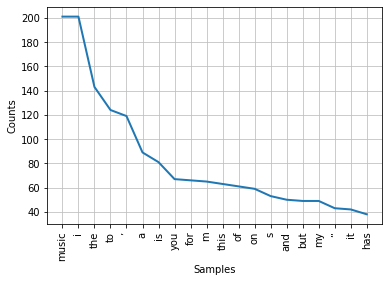

In [10]:
#Frequency plot unflitered with all tweets combined.
unfiltered_words = word_tokens
freq = nltk.FreqDist(unfiltered_words)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

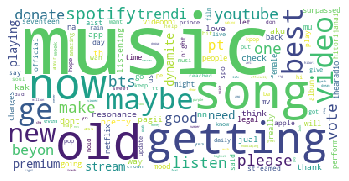

In [11]:
#Word Cloud unfiltered with all tweets combined.
wordcloud = WordCloud(
                          background_color='white',
                          max_words=150,
                          max_font_size=100, 
                          random_state=42,
                          collocations=False,
                         ).generate(" ".join(unfiltered_words))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [12]:
#Sentiment analysis unfiltered
sentiment_results = []

for tweets in tweets_df[2]:
    sentiment_tweet = analyser.polarity_scores(" ".join(tweets))
    print(sentiment_tweet)
    sentiment_results.append(sentiment_tweet)

{'neg': 0.0, 'neu': 0.951, 'pos': 0.049, 'compound': 0.7184}
{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.9001}
{'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'compound': 0.8402}
{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.9517}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.8402}
{'neg': 0.0, 'neu': 0.975, 'pos': 0.025, 'compound': 0.4588}
{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.9325}
{'neg': 0.019, 'neu': 0.908, 'pos': 0.073, 'compound': 0.765}
{'neg': 0.0, 'neu': 0.975, 'pos': 0.025, 'compound': 0.4588}
{'neg': 0.0, 'neu': 0.969, 'pos': 0.031, 'compound': 0.4588}
{'neg': 0.0, 'neu': 0.883, 'pos': 0.117, 'compound': 0.9325}
{'neg': 0.0, 'neu': 0.955, 'pos': 0.045, 'compound': 0.4588}
{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.9776}
{'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.7184}
{'neg': 0.0, 'neu': 0.908, 'pos': 0.092

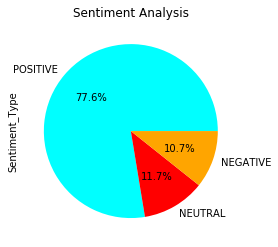

In [13]:
colours = ({'POSITIVE': 'green',
           'NEGATIVE': 'orange'})
senti_df = pd.DataFrame(sentiment_results,columns=['neg','neu','pos', 'compound'])

senti_df['Sentiment_Type']='NEUTRAL'
senti_df.loc[senti_df['compound']>0.6,'Sentiment_Type']='POSITIVE'
senti_df.loc[senti_df['compound']< 0.3,'Sentiment_Type']='NEGATIVE'

senti_df.Sentiment_Type.value_counts().plot(kind='pie',title="Sentiment Analysis",autopct='%1.1f%%',colors= ["cyan","red","orange"])

plt.show()

western:1
stans:1
make:17
sun:1
bts:19
making:4
dynam:1
dude:2
stop:3
listening:11
r:5
dont:13
love:12
proc:1
❗️tracking:1
week:6
inkigayo:1
goodmorning⛅️n:1
viewed:4
music:201
learning:1
play:6
piano:1
heawarming:1
turn:1
know:6
uncool:1
’:119
like:16
sweet:5
night:8
reached:5
mil:3
gramarie:1
weibo:1
updatennr:1
dmx:3
verse:1
touch:1
remi:1
trashy:1
romance:1
novel:1
beach:1
check:10
yout:1
update:6
tired:2
asf:1
lol:2
halo:2
nyari:2
apk:2
premium:15
di:2
👏:4
amazing:6
crown:5
spo:7
guarantee:2
u:9
twitter:1
arm:1
want:5
crowd:1
mosh:1
pit:1
whenever:1
perfor:1
pagii:11
kak:11
aku:11
jual:11
apps:11
legal:10
belated:1
happy:3
bihday:3
superstar:1
❤:1
maybe:31
getting:32
old:33
ge:31
best:29
⚠️🚨⚠️:1
nthe:1
votes:1
kmedia:1
repo:2
jungkook:2
ihearadio:9
awards:1
forever:1
☆҉☆:2
📣:3
♨️:2
🎶:3
ale:2
☞:2
arizo:1
could:3
find:3
yeah:4
playing:14
meet:3
us:10
vineyard:1
group:2
“:43
justice:3
surpassed:11
kpop:6
female:9
acts:3
highest:4
peak:3
seungkwan:3
werememberk:1
ight:1
back:9
omg:1
n

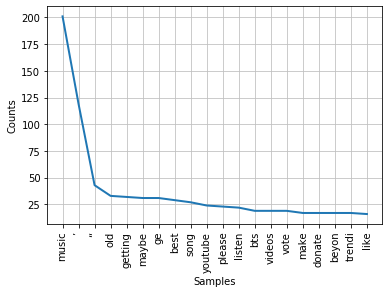

In [14]:

#Frequency plot filtered with all tweets combined.
freq = nltk.FreqDist(filtered_sentence)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

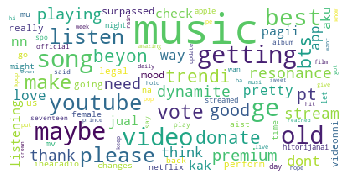

In [15]:
#Word Cloud filtered with all tweets combined.
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50,
                          collocations=False,
                          random_state=42
                         ).generate(" ".join(filtered_sentence))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

{'neg': 0.235, 'neu': 0.654, 'pos': 0.111, 'compound': -0.4404, 'tweet': ['western', 'stans', 'make', 'sun', 'bts', 'making', 'dynamite', 'english', 'shit', 'making', 'music', 'korean']}
{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'compound': -0.296, 'tweet': ['dude', 'stop', 'listening', 'rock', 'hip', 'hop', 'pop', 'bands', 'whatever', 'singers', 'music', 'made', 'labs', 'funde']}
{'neg': 0.429, 'neu': 0.463, 'pos': 0.108, 'compound': -0.7374, 'tweet': ['dont', 'love', 'process', 'wont', 'create', 'anything', 'beautiful', 'everything', 'wondrous', 'creation', 'babies', 'music', 'a']}
{'neg': 0.131, 'neu': 0.869, 'pos': 0.0, 'compound': -0.2411, 'tweet': ['tracking', 'week', 'inkigayo', 'music', 'core', 'doesnt', 'end', 'tomorrow', 'please', 'lets', 'hit', 'still', 'day', 'left']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'tweet': ['goodmorning']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'tweet': ['viewed', 'music', 'videos', 'past', 'h']}
{'neg': 0.0, 'neu': 0.4

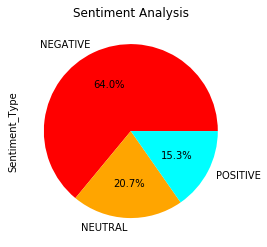

In [16]:
#Sentiment analysis filtered
sentiment_results = []

for tweets in cleaned_tweets:
    sentiment_tweet = analyser.polarity_scores(" ".join(tweets))
    sentiment_tweet['tweet'] = tweets
    print(sentiment_tweet)
    sentiment_results.append(sentiment_tweet)
    
senti_df = pd.DataFrame(sentiment_results,columns=['neg','neu','pos', 'compound','tweet'])

senti_df['Sentiment_Type']='NEUTRAL'
senti_df.loc[senti_df['compound']> 0.6,'Sentiment_Type']='POSITIVE'
senti_df.loc[senti_df['compound']< 0.3,'Sentiment_Type']='NEGATIVE'

senti_df.Sentiment_Type.value_counts().plot(kind='pie',title="Sentiment Analysis",autopct='%1.1f%%',colors= ["red","orange","cyan"])

plt.show()

In [17]:
senti_df

,neg,neu,pos,compound,tweet,Sentiment_Type
0,0.235,0.654,0.111,-0.4404,"[western, stans, make, sun, bts, making, dynam...",NEGATIVE
1,0.145,0.855,0.000,-0.2960,"[dude, stop, listening, rock, hip, hop, pop, b...",NEGATIVE
2,0.429,0.463,0.108,-0.7374,"[dont, love, process, wont, create, anything, ...",NEGATIVE
3,0.131,0.869,0.000,-0.2411,"[tracking, week, inkigayo, music, core, doesnt...",NEGATIVE
4,0.000,1.000,0.000,0.0000,[goodmorning],NEGATIVE
5,0.000,1.000,0.000,0.0000,"[viewed, music, videos, past, h]",NEGATIVE
6,0.000,0.417,0.583,0.4939,"[learning, play, piano, playing, music]",NEUTRAL
7,0.000,0.682,0.318,0.6369,"[heawarming, turn, events, kashmirs, glorious,...",POSITIVE
8,0.190,0.810,0.000,-0.2755,"[know, uncool, dont, like, name, internet, pro...",NEGATIVE
9,0.000,0.325,0.675,0.8074,"[sweet, night, reached, million, streams, cong...",POSITIVE


heawarming:1
turn:1
events:1
kashmirs:1
glorious:1
precarious:1
tradition:1
sufiyana:1
music:100
reaffirmed:1
sweet:2
night:3
reached:3
million:7
streams:3
congratulations:6
taehyung:2
:88
trashy:1
romance:1
novel:1
beach:1
listening:2
favorite:6
dmx:1
songs:11
may:2
peace:2
im:9
still:2
rooting:1
hi:1
best:28
votes:6
video:19
slow:1
burn:1
use:2
advantagetheir:1
increase:1
low:1
ihearadio:9
awards:9
mv:1
goal:1
replies:1
retweets:1
think:4
girls:1
blinks:8
omg:1
niall:1
proud:2
cant:1
put:3
words:1
rn:2
congrats:1
on:2
playing:8
secret:3
number:3
holiday:2
listen:9
no:2
radio:2
station:2
request:2
fav:3
follow:1
daily:1
rhema:1
word:1
kirk:1
franklin:1
wanna:1
happy:4
sending:2
u:2
id:4
like:9
love:33
language:3
crack:1
bat:1
ears:1
el:1
paso:1
spell:2
reduce:2
tears:2
release:2
t:2
fan:7
army:6
retweet:3
reply:3
requote:3
global:2
last:3
hours:2
be:2
drop:2
youre:1
loving:1
song:9
kiss:1
amazon:1
def:1
junny:1
offshore:1
stay:1
spotify:1
next:8
stream:9
ladies:4
gentlemen:4
perform:1

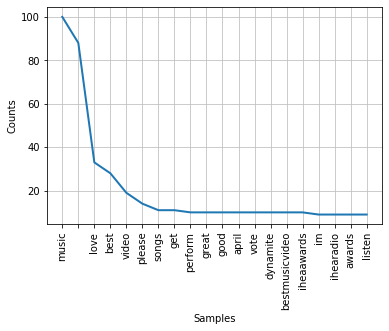

In [18]:
#Words from positive tweets
pos_words = ''
pos_words_list = []

for tweets in senti_df.loc[senti_df['Sentiment_Type'] == 'POSITIVE']['tweet']:
    pos_words += ' '.join(tweets)
    pos_words_list.extend(tweets)
    
#Frequency plot positive
freq = nltk.FreqDist(pos_words_list)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

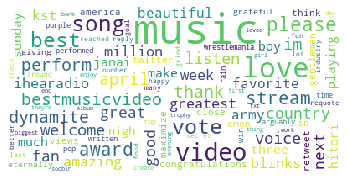

In [19]:
#word cloud for positive tweets
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          collocations=False,
                          random_state=42
                         ).generate(pos_words)

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

western:1
stans:2
make:13
sun:5
bts:10
making:5
dynamite:7
english:3
shit:6
music:315
korean:11
dude:2
stop:5
listening:12
rock:4
hip:3
hop:2
pop:5
bands:1
whatever:2
singers:1
made:3
labs:1
funde:1
dont:60
love:3
process:1
wont:4
create:1
anything:3
beautiful:1
everything:3
wondrous:1
creation:1
babies:3
a:7
tracking:2
week:17
inkigayo:1
core:2
doesnt:5
end:2
tomorrow:1
please:19
lets:6
hit:10
still:7
day:15
left:8
goodmorning:1
viewed:4
videos:23
past:7
h:6
know:8
uncool:1
like:14
name:3
internet:1
profiles:1
celebritynameofficial:1
its:9
just:1
gramarie:1
weibo:1
update:10
rocktown:1
festival:1
:295
whats:2
wrong:2
no:5
demo:1
dmx:3
verse:1
touch:1
remix:1
video:32
always:12
dopest:1
pa:2
check:11
youtube:44
theres:1
alternative:1
follow:4
playlist:8
contains:1
tay:1
im:44
tired:3
asf:1
lol:2
halo:2
nyari:2
apk:2
premium:8
di:2
jual:2
netflix:15
hbo:2
go:11
disney:4
hotstar:4
amazing:2
broke:4
k:14
nft:5
transactions:2
bake:2
featured:3
aists:10
tab:2
crown:7
days:6
guarantee:2
u:14

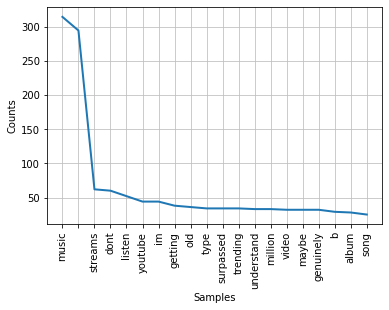

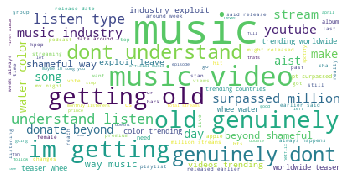

In [20]:
#word cloud for negative tweets

neg_words = ''
neg_words_list = []

for tweets in senti_df.loc[senti_df['Sentiment_Type'] == 'NEGATIVE']['tweet']:
    neg_words += ' '.join(tweets)
    neg_words_list.extend(tweets)

#Frequency plot negative tweets
freq = nltk.FreqDist(neg_words_list)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)
    
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(neg_words)

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

['learning', 'play', 'piano', 'playing', 'music']
['learning', 'play', 'piano', 'playing', 'music']
['pagii', 'kak', 'aku', 'jual', 'apps', 'premium', 'legal', 'full', 'garansi', 'murah', 'trusted', '', '', '', 'netflix', 'anti', 'hold', '', '', 'yo']
['learning', 'play', 'piano', 'playing', 'music', 'pagii', 'kak', 'aku', 'jual', 'apps', 'premium', 'legal', 'full', 'garansi', 'murah', 'trusted', '', '', '', 'netflix', 'anti', 'hold', '', '', 'yo']
['belated', 'happy', 'bihday', 'superstar', '', 'live', 'long', 'please', 'drop', 'music', '']
['learning', 'play', 'piano', 'playing', 'music', 'pagii', 'kak', 'aku', 'jual', 'apps', 'premium', 'legal', 'full', 'garansi', 'murah', 'trusted', '', '', '', 'netflix', 'anti', 'hold', '', '', 'yo', 'belated', 'happy', 'bihday', 'superstar', '', 'live', 'long', 'please', 'drop', 'music', '']
['kmedia', 'repo', 'jungkooks', 'global', 'music', 'power', 'continuing', 'success', 'solo', 'composed', 'songs', 'chas', 'ar']
['learning', 'play', 'piano',

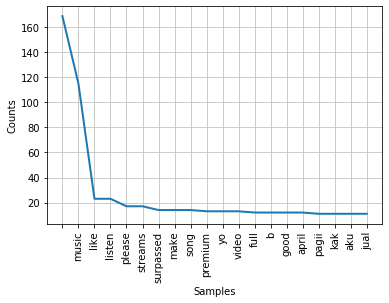

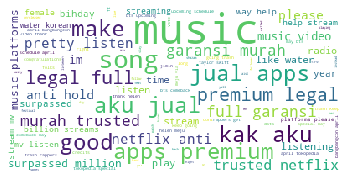

In [21]:
#word cloud for neutral tweets

neu_words = ''
neu_words_list = []
for tweets in senti_df.loc[senti_df['Sentiment_Type'] == 'NEUTRAL']['tweet']:
    neu_words += ' '.join(tweets)
    print(tweets)
    neu_words_list.extend(tweets)
    print(neu_words_list)

#Frequency plot neutral
freq = nltk.FreqDist(neu_words_list)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(neu_words)

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [22]:
set_pos_words = set(pos_words_list)
set_pos_words

{'',
 'a',
 'abolishing',
 'absolutely',
 'accessible',
 'account',
 'acting',
 'advantage',
 'advantagetheir',
 'affinity',
 'ago',
 'agree',
 'aist',
 'ajus',
 'album',
 'always',
 'amazing',
 'amazon',
 'america',
 'americanidol',
 'ampamp',
 'and',
 'apa',
 'app',
 'applause',
 'appreciate',
 'appreciated',
 'april',
 'arguably',
 'arha',
 'army',
 'around',
 'as',
 'asakaa',
 'ass',
 'aston',
 'award',
 'awards',
 'away',
 'baby',
 'back',
 'band',
 'banging',
 'bank',
 'based',
 'bat',
 'bc',
 'be',
 'beach',
 'beat',
 'beautiful',
 'beauty',
 'bergaransi',
 'best',
 'bestmusicvideo',
 'better',
 'bextra',
 'bi',
 'big',
 'biggest',
 'black',
 'blackstarkids',
 'bless',
 'blinks',
 'born',
 'bought',
 'boy',
 'boys',
 'bringing',
 'brings',
 'bts',
 'budgeted',
 'burn',
 'bythecoves',
 'call',
 'calming',
 'camp',
 'can',
 'cant',
 'catch',
 'category',
 'cause',
 'cb',
 'celebration',
 'ch',
 'chance',
 'characters',
 'check',
 'checks',
 'chord',
 'chuangthirdstage',
 'chuangxe

In [23]:
set_neg_words = set(neg_words_list)
set_neg_words

{'',
 'calendars',
 'avail',
 'gifts',
 'molly',
 'staycasapcomeback',
 'gbh',
 'lennon',
 'blondie',
 'mornin',
 'tutorial',
 'tell',
 'soft',
 'bigbang',
 'ight',
 'red',
 'lonely',
 'r',
 'wrapped',
 'epic',
 'desire',
 'turned',
 'dark',
 'waves',
 'jaehyuns',
 'seventeen',
 'and',
 'f',
 'fence',
 'covid',
 'daddys',
 'mood',
 'wont',
 'writer',
 'millennium',
 'entrance',
 'failed',
 'smooth',
 'viu',
 'rosenblum',
 'much',
 'mus',
 'called',
 'bank',
 'rain',
 'small',
 'trend',
 'theory',
 'stalking',
 'minutes',
 'mangun',
 'officially',
 'kid',
 'wanted',
 'saaca',
 'superm',
 'pay',
 'na',
 'chills',
 'thats',
 'gifted',
 'francisco',
 'juliet',
 'ranging',
 'disco',
 'bgyo',
 'az',
 'monetize',
 'submit',
 'imagining',
 'shitting',
 'socal',
 'gon',
 'just',
 'exploit',
 'country',
 'giants',
 'mutually',
 'episode',
 'ar',
 'storyboarding',
 'viral',
 'jealousy',
 'earphones',
 'case',
 'glass',
 'order',
 'peak',
 'prezi',
 'psalms',
 'consider',
 'trick',
 'europeanized'

In [24]:
set_neu_words = set(neu_words_list)
set_neu_words

{'',
 'a',
 'aaliyah',
 'able',
 'acc',
 'account',
 'accounts',
 'achieve',
 'across',
 'actor',
 'actual',
 'actually',
 'ad',
 'added',
 'adopt',
 'advantage',
 'affordable',
 'afraid',
 'age',
 'ahitsmari',
 'air',
 'airplane',
 'aist',
 'aists',
 'akira',
 'aku',
 'alarm',
 'album',
 'albums',
 'alexa',
 'ali',
 'always',
 'amanda',
 'amazing',
 'ampamp',
 'amusing',
 'analysis',
 'and',
 'andy',
 'annoying',
 'anointed',
 'anti',
 'anyone',
 'anything',
 'apa',
 'appreciation',
 'apps',
 'april',
 'ar',
 'arms',
 'army',
 'around',
 'ashnikko',
 'asked',
 'attractive',
 'au',
 'audacity',
 'aussie',
 'austin',
 'australia',
 'avail',
 'avoid',
 'awards',
 'aware',
 'away',
 'b',
 'back',
 'baffles',
 'ban',
 'band',
 'bangbangcon',
 'bangyedam',
 'bank',
 'base',
 'based',
 'bass',
 'bboom',
 'bc',
 'beautiful',
 'becoming',
 'belated',
 'believe',
 'beloved',
 'best',
 'bestmusicvideo',
 'better',
 'beyonc',
 'bgyo',
 'big',
 'biggest',
 'bihday',
 'bil',
 'billion',
 'bit',
 'b

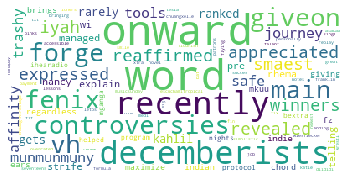

In [25]:
#Words unique to positive tweets
unique_pos = set_pos_words.difference(set_neg_words)
unique_pos = unique_pos.difference(set_neu_words)

#Word cloud for unique words from positive tweets 
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          random_state=42,
                          collocations=False,
                         ).generate(" ".join(unique_pos))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

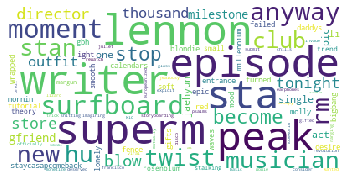

In [26]:
#words unique to negative tweets
unique_neg = set_neg_words.difference(set_pos_words)
unique_neg = unique_neg.difference(set_neu_words)
unique_neg

#Word cloud for unique negative words
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          random_state=42,
                          collocations=False,
                         ).generate(" ".join(unique_neg))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

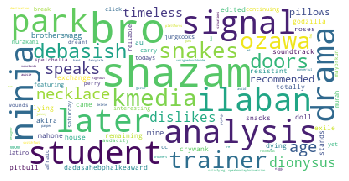

In [27]:
#Words unique to neutral tweets
unique_neu = set_neu_words.difference(set_pos_words)
unique_neu = unique_neu.difference(set_neg_words)
unique_neu

#Word cloud for unique neutral words
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          random_state=42,
                          collocations=False,
                         ).generate(" ".join(unique_neu))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [28]:
len(unique_pos)

336

In [29]:
len(unique_neg)

1338

In [30]:
len(unique_neu)

474